# Dataset Index Generation 

This is used to generate the indices for the training, validation, and test sets for four classes with pions. 

In [1]:
import sys
import os
import h5py
from collections import Counter
from progressbar import *
import re
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
#from watchmal.testing.repeating_classifier_training_utils import *
from functools import reduce

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

if par_dir not in sys.path:
    sys.path.append(par_dir)

sys.path.append("../..")
sys.path.append("..")


%load_ext autoreload
%matplotlib inline
%autoreload 2

from IPython.display import HTML

In [2]:
original_data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5"

f = h5py.File(original_data_path, "r")

In [3]:
print(f.keys())

for key in f.keys():
    print(f[key])

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index', 'event_ids', 'hit_charge', 'hit_pmt', 'hit_time', 'labels', 'positions', 'root_files', 'veto', 'veto2']>
<HDF5 dataset "angles": shape (23481549, 2), type "<f4">
<HDF5 dataset "energies": shape (23481549, 1), type "<f4">
<HDF5 dataset "event_hits_index": shape (23481549,), type "<i8">
<HDF5 dataset "event_ids": shape (23481549,), type "<i4">
<HDF5 dataset "hit_charge": shape (31533173829,), type "<f4">
<HDF5 dataset "hit_pmt": shape (31533173829,), type "<i4">
<HDF5 dataset "hit_time": shape (31533173829,), type "<f4">
<HDF5 dataset "labels": shape (23481549,), type "<i4">
<HDF5 dataset "positions": shape (23481549, 1, 3), type "<f4">
<HDF5 dataset "root_files": shape (23481549,), type "|O">
<HDF5 dataset "veto": shape (23481549,), type "|b1">
<HDF5 dataset "veto2": shape (23481549,), type "|b1">


In [4]:
hdf5_hit_pmt = f["hit_pmt"]
hdf5_hit_time = f["hit_time"]
hdf5_hit_charge = f["hit_charge"]

In [5]:
hit_pmt = np.memmap(original_data_path, mode="r", shape=hdf5_hit_pmt.shape,
                                    offset=hdf5_hit_pmt.id.get_offset(), dtype=hdf5_hit_pmt.dtype)

hit_time = np.memmap(original_data_path, mode="r", shape=hdf5_hit_time.shape,
                                    offset=hdf5_hit_time.id.get_offset(), dtype=hdf5_hit_time.dtype)

hit_charge = np.memmap(original_data_path, mode="r", shape=hdf5_hit_charge.shape,
                                    offset=hdf5_hit_charge.id.get_offset(), dtype=hdf5_hit_charge.dtype)

In [6]:
angles     = np.array(f['angles'])
energies   = np.array(f['energies'])
positions  = np.array(f['positions'])
labels     = np.array(f['labels'])
root_files = np.array(f['root_files'])

1.1857924
1160.258


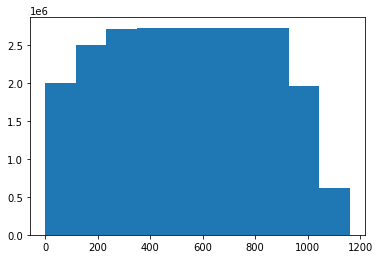

In [14]:
plt.hist(energies, bins=10)
print(np.min(energies))
print(np.max(energies))

138.07678
1138.0765


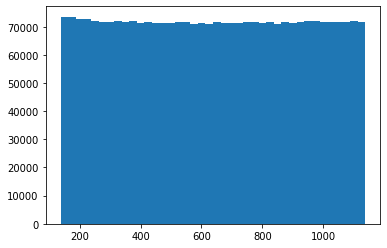

In [10]:
plt.hist(energies[labels==3],bins=40)
print(np.min(energies[labels==3]))
print(np.max(energies[labels==3]))

160.2933
1160.258


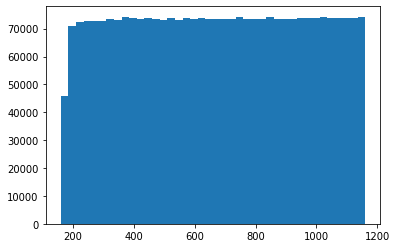

In [11]:
plt.hist(energies[labels==2],bins=40)
print(np.min(energies[labels==2]))
print(np.max(energies[labels==2]))

In [ ]:
# Set up indices
indices = np.array(range(len(labels)))

# Set up dict of file indices
file_dict = dict.fromkeys(root_files)
print("Dict set")

for file in file_dict.keys():
    file_dict[file] = []

for idx, root_file in enumerate(root_files):
    file_dict[root_file].append(idx)
print("Done")

In [ ]:
# Get files associated with each particle type

gamma_indices = indices[np.where(labels == 0)]
gamma_root_file_set = list(dict.fromkeys(root_files[gamma_indices]))

e_indices     = indices[np.where(labels == 1)]
e_root_file_set = list(dict.fromkeys(root_files[e_indices]))

mu_indices    = indices[np.where(labels == 2)]
mu_root_file_set = list(dict.fromkeys(root_files[mu_indices]))

pion_indices    = indices[np.where(labels == 3)]
pion_root_file_set = list(dict.fromkeys(root_files[pion_indices]))

print(len(e_root_file_set))
print(len(mu_root_file_set))
print(len(gamma_root_file_set))
print(len(pion_root_file_set))

In [ ]:
def get_indices_for_files(file_names):
    all_indices = []
    for file_name in file_names:
        all_indices.extend(file_dict[file_name])
    return np.array(all_indices)

In [ ]:
mu_test_files, mu_val_files, mu_train_files = mu_root_file_set[0:400], mu_root_file_set[400:500], mu_root_file_set[500:]

mu_test_set, mu_val_set, mu_train_set = get_indices_for_files(mu_test_files), get_indices_for_files(mu_val_files), get_indices_for_files(mu_train_files)

print(mu_test_set)

In [ ]:
gamma_test_files, gamma_val_files, gamma_train_files = gamma_root_file_set[0:400], gamma_root_file_set[400:500], gamma_root_file_set[500:1000]

gamma_test_set, gamma_val_set, gamma_train_set = get_indices_for_files(gamma_test_files), get_indices_for_files(gamma_val_files), get_indices_for_files(gamma_train_files)

print(gamma_test_set)

In [ ]:
e_test_files, e_val_files, e_train_files = e_root_file_set[0:400], e_root_file_set[400:500], e_root_file_set[500:1000]

e_test_set, e_val_set, e_train_set = get_indices_for_files(e_test_files), get_indices_for_files(e_val_files), get_indices_for_files(e_train_files)

print(e_test_set)

In [ ]:
pion_test_files, pion_val_files, pion_train_files = pion_root_file_set[0:400], pion_root_file_set[400:500], pion_root_file_set[500:1000]

pion_test_set, pion_val_set, pion_train_set = get_indices_for_files(pion_test_files), get_indices_for_files(pion_val_files), get_indices_for_files(pion_train_files)

print(pion_test_set)

In [ ]:
# Verify that indices match
all_e_indices = np.concatenate((e_test_set, e_val_set, e_train_set))
print(set(labels[all_e_indices]))

all_gamma_indices = np.concatenate((gamma_test_set, gamma_val_set, gamma_train_set))
print(set(labels[all_gamma_indices]))

all_mu_indices = np.concatenate((mu_test_set, mu_val_set, mu_train_set))
print(set(labels[all_mu_indices]))

all_pion_indices = np.concatenate((pion_test_set, pion_val_set, pion_train_set))
print(set(labels[all_pion_indices]))

In [ ]:
# Verify that all events are uniquely accounted for
all_collected_indices = np.concatenate((e_test_set, e_val_set, e_train_set, gamma_test_set, gamma_val_set, gamma_train_set, mu_test_set, mu_val_set, mu_train_set, pion_test_set, pion_val_set, pion_train_set))

print(len(labels))
print(len(all_collected_indices))
print(len(set(all_collected_indices)))

In [ ]:
train_idxs = np.concatenate((e_train_set, mu_train_set, gamma_train_set, pion_train_set))
val_idxs   = np.concatenate((e_val_set, mu_val_set, gamma_val_set, pion_val_set))
test_idxs  = np.concatenate((e_test_set, mu_test_set, gamma_test_set, pion_test_set))

In [ ]:
np.savez('/home/hlahiouel/IWCD_mPMT_Short_4_class_emgp0_veto_idxs.npz', train_idxs=train_idxs, val_idxs=val_idxs, test_idxs=test_idxs)